# Exploring and Cleaning the Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
rentals = pd.read_json('train_data.json')

In [7]:
rentals.head()

,Balcony,Cats Allowed,Common Outdoor Space,Dining Room,Dishwasher,Dogs Allowed,Doorman,Elevator,Exclusive,Fitness Center,...,index,interest_level,latitude,level_0,listing_id,longitude,manager_id,photos,price,street_address
0,0,0,0,0,0,0,0,0,0,0,...,10,medium,40.7145,0,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
1,0,1,0,0,0,1,1,1,0,1,...,10000,low,40.7947,1,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
10,0,0,0,0,1,0,1,1,0,1,...,122571,low,40.7695,10005,6878679,-73.9603,781c05e464ce94eaa436401d07f2a6cc,[https://photos.renthop.com/2/6878679_b53fe0cc...,5200,200 East 72nd Street
100,0,0,0,0,0,0,0,0,0,0,...,122816,low,40.7845,10104,6923817,-73.9760,096ce7507f4f3678b32780d20bfab49f,[],3995,150 West 82nd Street
1000,0,1,0,0,1,0,1,1,0,0,...,13249,low,40.7771,11036,7097593,-73.9505,7b392b11d691f65a71e58a3f76aaf04e,[https://photos.renthop.com/2/7097593_b437c54a...,2300,336 E 86 St.


Just looking at these five rows of data, we can see that there are 42 columns, or features. There is a mix of qualitative and quantitative variables. Different columns may have data that are binary, discrete, continuous, categorical, etc. Some entires are numerical, some are strings, some are a mix. 

In [8]:
rentals.describe()

,Balcony,Cats Allowed,Common Outdoor Space,Dining Room,Dishwasher,Dogs Allowed,Doorman,Elevator,Exclusive,Fitness Center,...,Terrace,Wheelchair Access,bathrooms,bedrooms,index,latitude,level_0,listing_id,longitude,price
count,41918.000000,41918.000000,41918.000000,41918.000000,41918.000000,41918.000000,41918.000000,41918.000000,41918.000000,41918.000000,...,41918.000000,41918.000000,41918.000000,41918.000000,41918.000000,41918.000000,41918.000000,4.191800e+04,41918.000000,4.191800e+04
mean,0.061239,0.478052,0.026170,0.104299,0.413068,0.447373,0.422515,0.524953,0.044372,0.270123,...,0.046376,0.027745,1.211950,1.537621,62028.264612,40.742705,24646.531800,7.024133e+06,-73.957629,3.829015e+03
std,0.239770,0.499524,0.159643,0.305652,0.492391,0.497229,0.493966,0.499383,0.205923,0.444028,...,0.210301,0.164242,0.502177,1.114057,35769.640616,0.600334,14248.642743,1.260963e+05,1.110224,2.334703e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,31064.250000,40.728300,12325.250000,6.916416e+06,-73.991700,2.495000e+03
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,61901.500000,40.751800,24692.500000,7.021090e+06,-73.977900,3.150000e+03
75%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,2.000000,93043.250000,40.774300,36942.750000,7.128524e+06,-73.954700,4.100000e+03
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,10.000000,8.000000,124009.000000,44.603800,49350.000000,7.753784e+06,0.000000,4.490000e+06


Looking at this statistical summary:
- For most of the data, the count is consistent, suggesting that there is not that much missing data.
- For many of the columns, the values are binary. 
- Also notice that there are only 33 columns, indicating that some of these variables, most likely text, could not be included in the statistical summary. An example of this is `street_address`. 

Note that the data needs some pre-processing. We will want to substitute columns of text with numerical values for this analysis. 

### Substituting categories with numerical values

In [3]:
# Replace interest_level: 'low, medium, high' with 0, 1, 2
rentals.replace(['low', 'medium', 'high'], [0, 1, 2], inplace=True)
rentals['interest_level'].head()

0       1
1       0
10      0
100     0
1000    0
Name: interest_level, dtype: int64

### Dropping unused columns

In [ ]:
# TODO Replace manager_id and building_id instead of dropping them
# rentals_clean = rentals.drop[(['display_address','photos','street_address', 'building_id', 'manager_id','features'], axis=1, inplace=False)]

For now, let's just use numerical columns only. An improvement on this model could be to use the columns that are not just numerical. 

In [4]:
rentals_clean = rentals.select_dtypes(include=[np.number]) # Select columns only containing number data types 
rentals_clean.head()

,Balcony,Cats Allowed,Common Outdoor Space,Dining Room,Dishwasher,Dogs Allowed,Doorman,Elevator,Exclusive,Fitness Center,...,Wheelchair Access,bathrooms,bedrooms,index,interest_level,latitude,level_0,listing_id,longitude,price
0,0,0,0,0,0,0,0,0,0,0,...,0,1.5,3,10,1,40.7145,0,7211212,-73.9425,3000
1,0,1,0,0,0,1,1,1,0,1,...,0,1.0,2,10000,0,40.7947,1,7150865,-73.9667,5465
10,0,0,0,0,1,0,1,1,0,1,...,0,1.0,3,122571,0,40.7695,10005,6878679,-73.9603,5200
100,0,0,0,0,0,0,0,0,0,0,...,0,1.0,1,122816,0,40.7845,10104,6923817,-73.9760,3995
1000,0,1,0,0,1,0,1,1,0,0,...,0,1.0,0,13249,0,40.7771,11036,7097593,-73.9505,2300


### Pair-wise correlations

In [8]:
corr = rentals.corr()

In [9]:
corr.head()

,Balcony,Cats Allowed,Common Outdoor Space,Dining Room,Dishwasher,Dogs Allowed,Doorman,Elevator,Exclusive,Fitness Center,...,Terrace,Wheelchair Access,bathrooms,bedrooms,index,latitude,level_0,listing_id,longitude,price
Balcony,1.000000,0.017895,-0.028158,0.245208,0.231908,0.022130,0.162431,0.169046,-0.041507,0.128755,...,0.464583,0.038638,0.143434,0.103327,-0.007539,0.004592,0.003524,0.002470,-0.004383,0.011582
Cats Allowed,0.017895,1.000000,0.106673,-0.025945,-0.046506,0.936880,0.091194,0.034568,0.032892,0.128856,...,0.007191,0.037518,0.017855,-0.008376,-0.007526,-0.007268,-0.002388,0.002290,0.005535,0.011299
Common Outdoor Space,-0.028158,0.106673,1.000000,-0.043717,-0.085930,0.107663,0.126002,0.113751,0.033617,0.196436,...,-0.029045,-0.016774,-0.003425,0.005396,0.024723,-0.004602,0.011135,0.000063,-0.005096,-0.000422
Dining Room,0.245208,-0.025945,-0.043717,1.000000,0.355879,-0.020394,0.203796,0.201764,-0.072015,0.184223,...,0.243189,0.109159,0.246874,0.200341,-0.001756,0.006333,0.001161,-0.002370,-0.005277,0.020435
Dishwasher,0.231908,-0.046506,-0.085930,0.355879,1.000000,-0.043973,0.318889,0.349221,-0.108303,0.278991,...,0.200897,0.143250,0.172277,0.158918,0.007205,0.010546,-0.000284,-0.015015,-0.015941,0.012754


### Visualizing Correlations

In [12]:
import seaborn as sb
%matplotlib inline 
import matplotlib.pyplot as plt

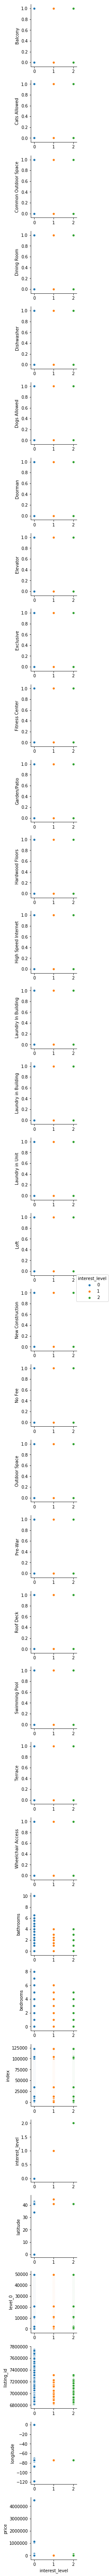

In [13]:
sb.pairplot(data=rentals_clean,
            x_vars=['interest_level'],
            y_vars=list(rentals_clean),
            hue='interest_level')

# Classification Models

In [14]:
y = rentals_clean['interest_level']
y.head()

0       1
1       0
10      0
100     0
1000    0
Name: interest_level, dtype: int64

In [15]:
X = rentals_clean.drop('interest_level', axis=1, inplace=False)
X.head()

,Balcony,Cats Allowed,Common Outdoor Space,Dining Room,Dishwasher,Dogs Allowed,Doorman,Elevator,Exclusive,Fitness Center,...,Terrace,Wheelchair Access,bathrooms,bedrooms,index,latitude,level_0,listing_id,longitude,price
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1.5,3,10,40.7145,0,7211212,-73.9425,3000
1,0,1,0,0,0,1,1,1,0,1,...,0,0,1.0,2,10000,40.7947,1,7150865,-73.9667,5465
10,0,0,0,0,1,0,1,1,0,1,...,0,0,1.0,3,122571,40.7695,10005,6878679,-73.9603,5200
100,0,0,0,0,0,0,0,0,0,0,...,0,0,1.0,1,122816,40.7845,10104,6923817,-73.9760,3995
1000,0,1,0,0,1,0,1,1,0,0,...,0,0,1.0,0,13249,40.7771,11036,7097593,-73.9505,2300


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# Split data into train and test sets: 70% train, 30% test 
train_x, test_x, train_y, test_y = train_test_split(X, y , test_size=0.3, random_state=42)    

### Functions for model assessment

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def assess_model(clf):
    # Assess model accuracy
    results = clf.predict(test_x)
    accuracy = accuracy_score(test_y, results)
    print("Accuracy Score:")
    print(accuracy)

In [ ]:
# TODO Add more metrics for assessment
# TODO Add functions for plotting

## Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rf = RandomForestClassifier(n_estimators=100) # TODO adjust n_estimators and plot
rf.fit(train_x, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [47]:
assess_model(rf)

Accuracy Score:
0.722487277354


## Decision Tree Classifier

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
dt = DecisionTreeClassifier() 
dt.fit(train_x, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [55]:
assess_model(dt)

Accuracy Score:
0.644004452926


## Bagging Classifier

In [56]:
from sklearn.ensemble import BaggingClassifier

In [57]:
bag = BaggingClassifier()
bag.fit(train_x, train_y)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [58]:
assess_model(bag)

Accuracy Score:
0.722805343511


## Gradient Boosting Classifier

In [59]:
from sklearn.ensemble import GradientBoostingClassifier

In [60]:
boost = GradientBoostingClassifier()
boost.fit(train_x, train_y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [61]:
assess_model(boost)

Accuracy Score:
0.719783715013


## Ridge Classifier with Cross Validation

In [62]:
from sklearn.linear_model import RidgeClassifierCV

In [63]:
ridge = RidgeClassifierCV()
ridge.fit(train_x, train_y)

RidgeClassifierCV(alphas=(0.1, 1.0, 10.0), class_weight=None, cv=None,
         fit_intercept=True, normalize=False, scoring=None)

In [64]:
assess_model(ridge)

Accuracy Score:
0.687261450382


## Support Vector Machine

In [20]:
from sklearn.svm import SVC

In [21]:
svm_clf = SVC()
svm_clf.fit(train_x, train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [22]:
assess_model(svm_clf)

Accuracy Score:
0.698155216285


## Neural Network

In [16]:
# Multi-layer Perceptron algorithm, uses backpropagation
from sklearn.neural_network import MLPClassifier

In [17]:
nnet = MLPClassifier()
nnet.fit(train_x, train_y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [18]:
assess_model(nnet)

Accuracy Score:
0.698155216285


# Parameter Tuning

Looking at the previous models, we found that ensemble methods, such as the Bagging Classifier and the Random Forest Classifier, yielded the best results in terms of classification accuracy. Working off of these models, we can use grid search to tune the parameters of the model.  

### Parameter Tuning: n_estimators

In [22]:
from sklearn.ensemble import BaggingClassifier

In [23]:
bag_1 = BaggingClassifier(n_estimators=1)
bag_1.fit(train_x, train_y)
assess_model(bag_1)

Accuracy Score:
0.635973282443


In [24]:
bag_10 = BaggingClassifier(n_estimators=10)
bag_10.fit(train_x, train_y)
assess_model(bag_10)

Accuracy Score:
0.711354961832


In [ ]:
bag_100 = BaggingClassifier(n_estimators=100)
bag_100.fit(train_x, train_y)
assess_model(bag_100)

Accuracy Score:
0.722089694656


In [ ]:
bag_1000 = BaggingClassifier(n_estimators=1000)
bag_1000.fit(train_x, train_y)
assess_model(bag_1000)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_1 = RandomForestClassifier(n_estimators=1) 
rf_1.fit(train_x, train_y)
assess_model(rf_1)

In [ ]:
rf_10 = RandomForestClassifier(n_estimators=10) 
rf_10.fit(train_x, train_y)
assess_model(rf_10)

In [ ]:
rf_100 = RandomForestClassifier(n_estimators=100) 
rf_100.fit(train_x, train_y)
assess_model(rf_100)

In [ ]:
rf_1000 = RandomForestClassifier(n_estimators=1000) 
rf_1000.fit(train_x, train_y)
assess_model(rf_1000)

### Cross-Validation Grid Search

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [31]:
BaggingClassifier().get_params().keys()

dict_keys(['base_estimator', 'bootstrap', 'bootstrap_features', 'max_features', 'max_samples', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [20]:
bagging_params = [{'n_estimators': [1, 10, 100, 1000]}]

In [21]:
gs_bagging = GridSearchCV(BaggingClassifier(), bagging_params)
gs_bagging.fit(train_x, train_y)

KeyboardInterrupt: 

In [ ]:
assess_model(gs_bagging)

In [ ]:
RandomForestClassifier().get_params().keys()

In [ ]:
rf_params = [{'n_estimators': [1, 10, 100, 1000]}]

In [ ]:
gs_rf = GridSearchCV(RandomForestClassifier(), rf_params)
gs_rf.fit(train_x, train_y)

In [ ]:
assess_model(gs_rf)

# Conclusions